In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [2]:
def sim(seed,spike_train):
    random.seed(seed)
    
    N_0=10
    Pr1=0.0744
    alpha_0=-np.log((1-Pr1))/N_0

    Cs=np.array([0.9,0.95,0.8])
    tau_f=np.array([35,190,2000])/1000
    tau_d=2

    Fs=np.zeros((len(spike_train),3))
    F=np.ones(len(spike_train))
    N=np.zeros(len(spike_train))
    alpha_v=np.ones(len(spike_train))
    Pr=np.ones(len(spike_train))

    alpha_v[0]=alpha_0
    Fs[0,:]=np.ones(3)
    N[0]=N_0
    Pr[0]=Pr1
    
    for i,t in enumerate(spike_train[:-1]):
        Fs[i+1,:]=1+Cs*np.exp(-(spike_train[i+1]-spike_train[i])/tau_f)*Fs[i,:]
        F[i+1]=np.prod(Fs[i+1,:])
        alpha_v[i+1]=alpha_0*F[i+1]

        #print(alpha_v[i],N[i])

        u=random.uniform(0,1)
        r=random.uniform(0,1)
        N[i+1]=N[i]
        if u < Pr[i]:
            N[i+1]=N[i+1]-1
        if r < 1-np.exp(-(spike_train[i+1]-spike_train[i])/tau_d) and N[i+1]<N_0:
            N[i+1]=N[i+1]+1

        #vesicle release probability
        Pr[i+1]=1-np.exp(-alpha_v[i+1]*N[i+1])
    
    return Pr

In [8]:
#C,V,release=sim()

T=np.linspace(0,2,1001)
spike_train=np.array([0.0022, 0.0522, 0.1022, 0.1522, 0.2023, 0.2522, 0.3021, 0.3522,
       0.4022, 0.4522, 0.5022, 0.5523, 0.6022, 0.6522, 0.7023, 0.7522,
       0.8022, 0.8522, 0.9022, 0.9522])


N=100

P=Pool(8)
Prs=P.starmap(sim,zip(range(N),N*[spike_train]))
Pr=np.average(np.array(Prs),axis=0)
#release=np.average(np.array(releases),axis=0)
#spike_train=np.average(np.array(spike_trains),axis=0)

In [41]:
C=data[0,:]
V=data[1,:]
beta=data[2,:]
P_s=data[3,:]
data.shape

(4, 1001)

Text(0.5, 1.0, 'Releases')

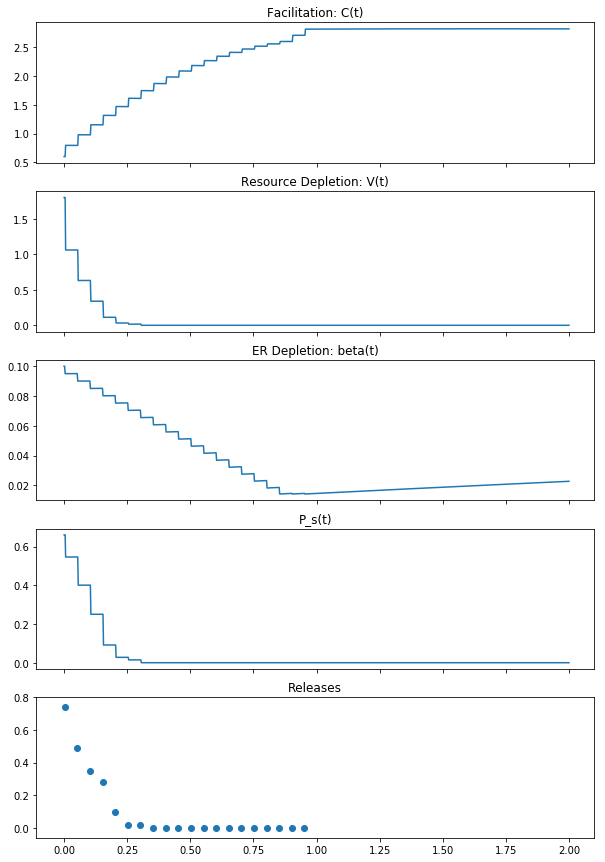

In [42]:
fig, ax = plt.subplots(nrows=5,ncols=1,sharex=True,figsize=(10,15))

ax[0].plot(T,C)
ax[0].set_title("Facilitation: C(t)")

ax[1].plot(T,V)
ax[1].set_title("Resource Depletion: V(t)")

ax[2].plot(T,beta)
ax[2].set_title("ER Depletion: beta(t)")

ax[3].plot(T,P_s)
ax[3].set_title("P_s(t)")

ax[4].scatter(spike_train,release)
ax[4].set_title("Releases")

## Loading mcell results

In [12]:
res_loc="/home/kabir/Project/tripartiteSynapse/results/freq/"
data={}
peaks={}

fnames=["R150control20hz","R150ER2x20hz","R150ER3x20hz","R300ER2x20hz","R300ER3x20hz"] #,"R150ER2x20hz" "R150ER3x20hz"
for sim_type in fnames:
    loc=res_loc+sim_type+"/result"
    print(loc)
    data[sim_type]=np.loadtxt(loc)
    peaks[sim_type]=np.loadtxt(res_loc+sim_type+"/caStat.dat").T[1]

/home/kabir/Project/tripartiteSynapse/results/freq/R150control20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R150ER2x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R150ER3x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R300ER2x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R300ER3x20hz/result


array([0.0744, 0.2672, 0.3853, 0.4909, 0.6266, 0.6735, 0.6393, 0.6996,
       0.688 , 0.6778, 0.6242, 0.5712, 0.4756, 0.4314, 0.3758, 0.312 ,
       0.2895, 0.2487, 0.2514, 0.263 ])

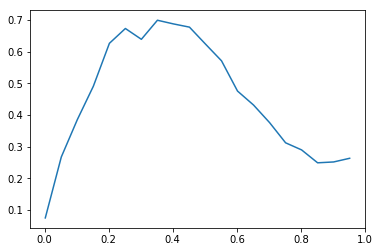

In [13]:
plt.plot(spike_train,data["R150control20hz"].T[1])
data["R150control20hz"].T[1]

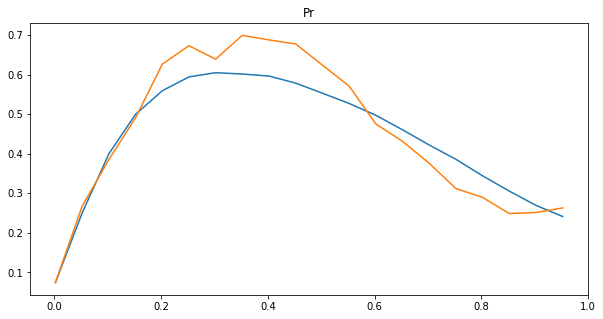

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,5))

ax.plot(spike_train,Pr,label="wang")
ax.set_title("Pr")

ax.plot(spike_train,data["R150control20hz"].T[1],label="mcell")

In [11]:
peaks["R300ER3x20hz"]

NameError: name 'peaks' is not defined

In [95]:
C_0=0.6
V_0=1.8
tau_c=15
tau_v=30
alpha=0.1
beta_0=0.1
beta_s=0.005 #er refilling slope
tau_er=10

1-np.exp(-((alpha+beta_0)*C_0*V_0))

0.19426469812652036

In [61]:
#input spike times
spike_train=np.array(range(20))/20
release=np.zeros(10,dtype=np.bool)

In [62]:
N_0=10
Pr1=0.0744
alpha_0=-np.log((1-Pr1))/N_0

Cs=np.array([0.9,0.95,0.8])
tau_f=np.array([35,190,2000])/1000
tau_d=2

Fs=np.zeros((len(spike_train),3))
F=np.ones(len(spike_train))
N=np.zeros(len(spike_train))
alpha_v=np.ones(len(spike_train))
Pr=np.ones(len(spike_train))

alpha_v[0]=alpha_0
Fs[0,:]=np.ones(3)
N[0]=N_0
Pr[0]=Pr1

In [63]:
for i,t in enumerate(spike_train[:-1]):
    Fs[i+1,:]=1+Cs*np.exp(-(spike_train[i+1]-spike_train[i])/tau_f)*Fs[i,:]
    F[i+1]=np.prod(Fs[i+1,:])
    alpha_v[i+1]=alpha_0*F[i+1]
    
    print(alpha_v[i],N[i])
    
    u=random.uniform(0,1)
    r=random.uniform(0,1)
    N[i+1]=N[i]
    if u < Pr[i]:
        N[i+1]=N[i+1]-1
    if r < 1-np.exp(-(spike_train[i+1]-spike_train[i])/tau_d) and N[i+1]<N_0:
        N[i+1]=N[i+1]+1
        
    #vesicle release probability
    Pr[i+1]=1-np.exp(-alpha_v[i+1]*N[i+1])
    
    
    

0.0077313103102670255 10.0
0.028950005973318805 10.0
0.052766800702086655 9.0
0.0747286403091613 8.0
0.09360254438006228 7.0
0.10921753303940047 7.0
0.12182176794455149 7.0
0.13182637004675885 7.0
0.13967623203506677 7.0
0.1457865106834594 6.0
0.15051671864062963 5.0
0.15416494804160083 5.0
0.15697173458350583 4.0
0.159127749592592 3.0
0.16078234232376626 3.0
0.16205154712294628 3.0
0.16302501503163117 3.0
0.1637717521832457 2.0
0.16434474142109595 2.0
